# Ecommerce EDA Analysis

- This dataset contains 55,000 entries of synthetic customer transactions, generated using Python's Faker library. The goal behind creating this dataset was to provide a resource for learners like myself to explore, analyze, and apply various data analysis techniques in a context that closely mimics real-world data.

#### About the Dataset:

- CID (Customer ID): A unique identifier for each customer.
- TID (Transaction ID): A unique identifier for each transaction.
- Gender: The gender of the customer, categorized as Male or Female.
- Age Group: Age group of the customer, divided into several ranges.
- Purchase Date: The timestamp of when the transaction took place.
- Product Category: The category of the product purchased, such as Electronics, Apparel, etc.
- Discount Availed: Indicates whether the customer availed any discount (Yes/No).
- Discount Name: Name of the discount applied (e.g., FESTIVE50).
- Discount Amount (INR): The amount of discount availed by the customer.
- Gross Amount: The total amount before applying any discount.
- Net Amount: The final amount after applying the discount.
- Purchase Method: The payment method used (e.g., Credit Card, Debit Card, etc.).
- Location: The city where the purchase took place.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
ED = pd.read_csv('Ecommerce_Fake_Dataset.csv')
ED.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [3]:
ED.shape

(55000, 13)

In [4]:
ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [5]:
missing_values = ED.isnull().sum()
missing_values

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [6]:
data_types = ED.dtypes
data_types

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
dtype: object

In [7]:
ED.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [8]:
ED['Purchase Date'] = pd.to_datetime(ED['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

In [9]:
ED.describe()

,CID,TID,Purchase Date,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,2022-03-19 14:27:22.813054464,136.986796,3012.936606,2875.949810
min,100009.000000,1.000163e+09,2019-09-19 11:46:07,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,2020-12-17 14:39:50,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,2022-03-17 06:27:07,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,2023-06-21 10:14:07.500000,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,2024-09-18 16:00:08,500.000000,8394.825600,8394.825600
std,260603.330337,2.594534e+09,NaN,165.375502,1718.431066,1726.127778


#### Which Product Category Sells the most?

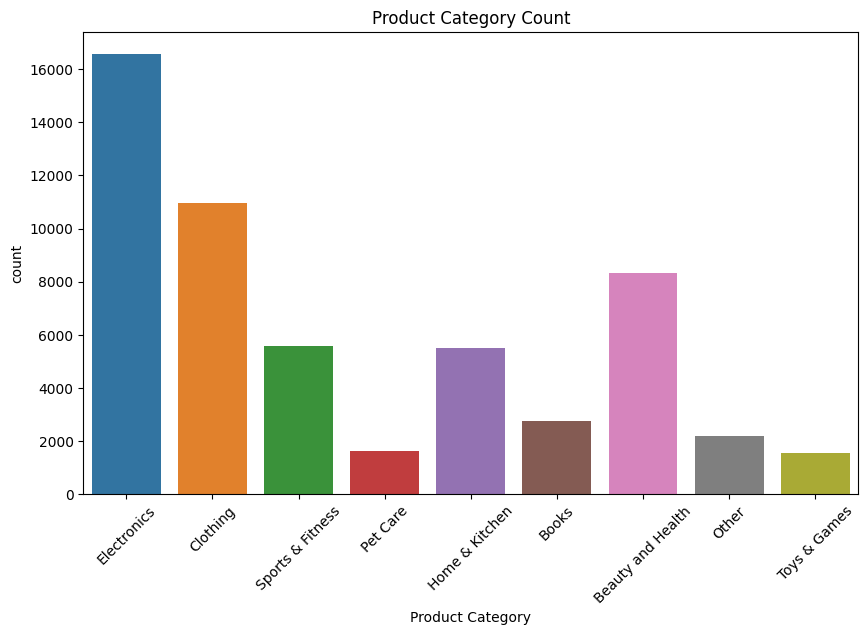

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=ED, x='Product Category', hue='Product Category', legend=False)
plt.title('Product Category Count')
plt.xticks(rotation=45)
plt.show()

#### Which Age Group does shopping the most?

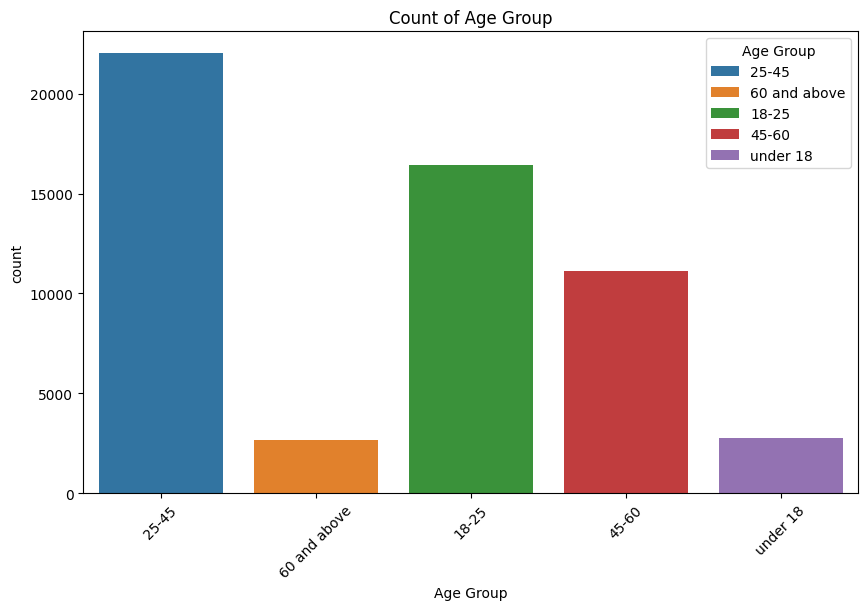

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=ED, x='Age Group', hue='Age Group', legend=True)
plt.title('Count of Age Group')
plt.xticks(rotation=45)
plt.show()

#### Which Purchase Method has been used the most?

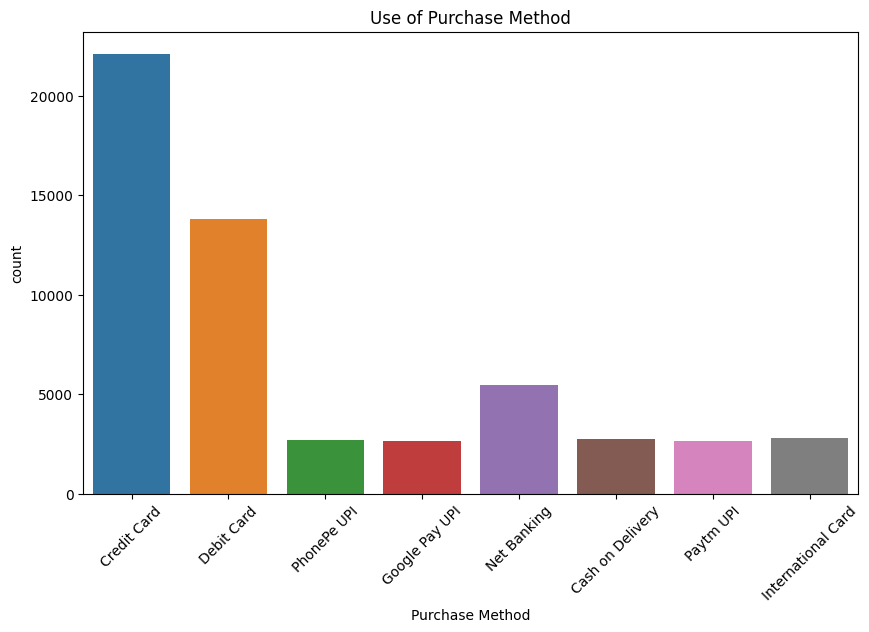

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=ED, x='Purchase Method', hue='Purchase Method', legend=False)
plt.title('Use of Purchase Method')
plt.xticks(rotation=45)
plt.show()

#### Which Gender does shopping the most?

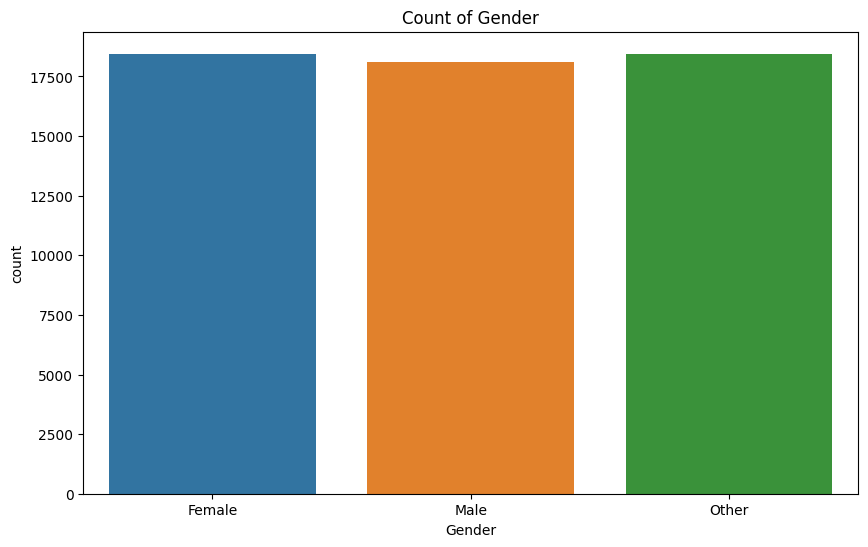

In [13]:
# Bar plot for Gender.
plt.figure(figsize=(10, 6))
sns.countplot(data=ED, x='Gender',hue='Gender')
plt.title('Count of Gender')
plt.show()

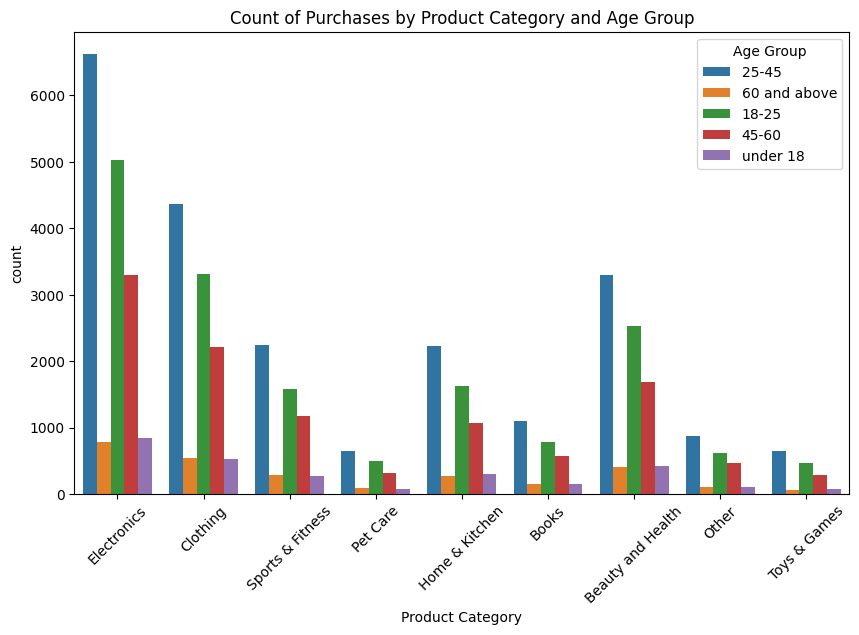

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ED, x='Product Category', hue='Age Group')
plt.title('Count of Purchases by Product Category and Age Group')
plt.xticks(rotation=45)
plt.show()

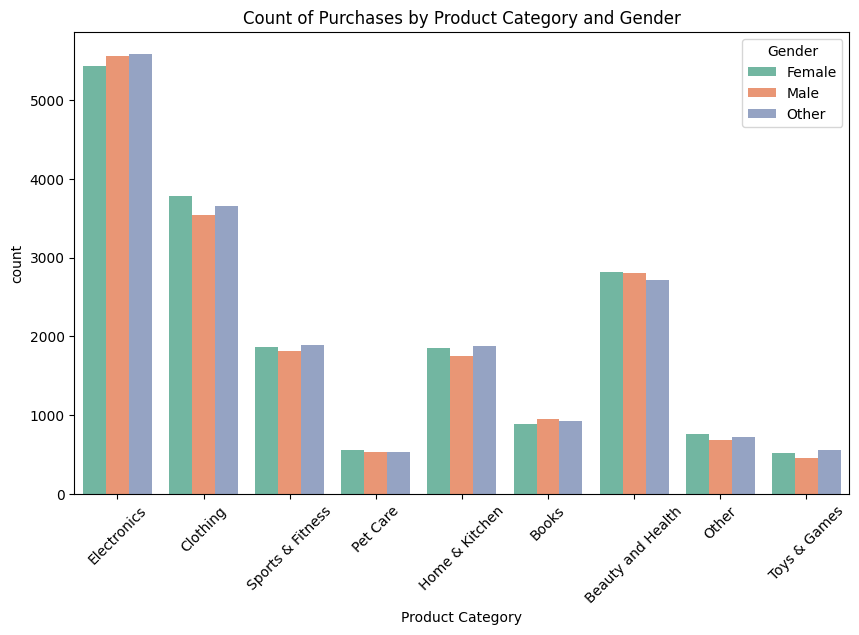

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ED, x='Product Category', hue='Gender', palette='Set2')
plt.title('Count of Purchases by Product Category and Gender')
plt.xticks(rotation=45)
plt.show()

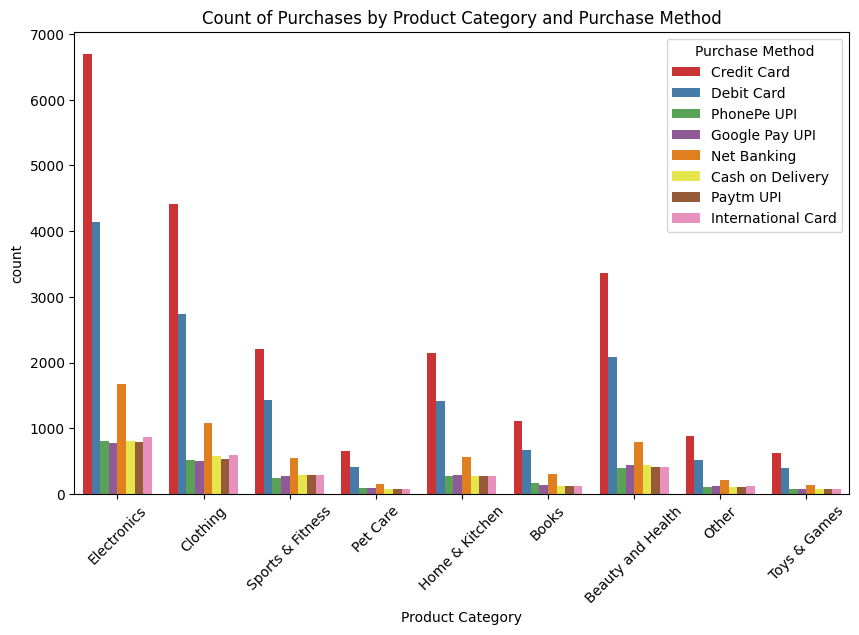

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ED, x='Product Category', hue='Purchase Method', palette='Set1')
plt.title('Count of Purchases by Product Category and Purchase Method')
plt.xticks(rotation=45)
plt.show()

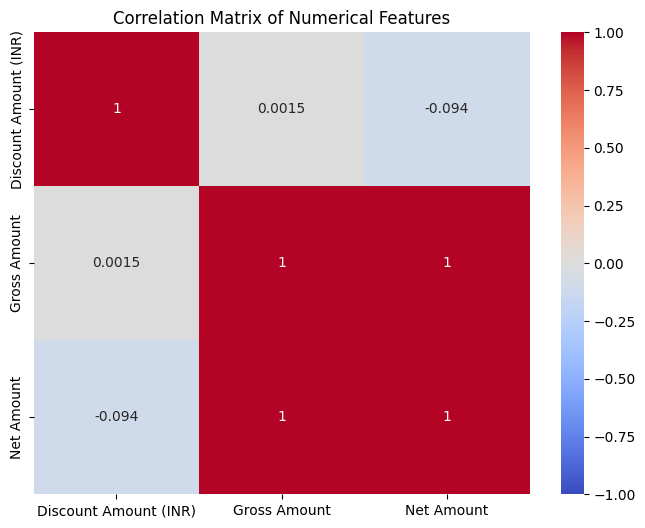

In [17]:
# select numrical colunms
numerical_cols = ['Discount Amount (INR)', 'Gross Amount', 'Net Amount']
# Correlation Matrix
corr_matrix = ED[numerical_cols].corr()
# plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

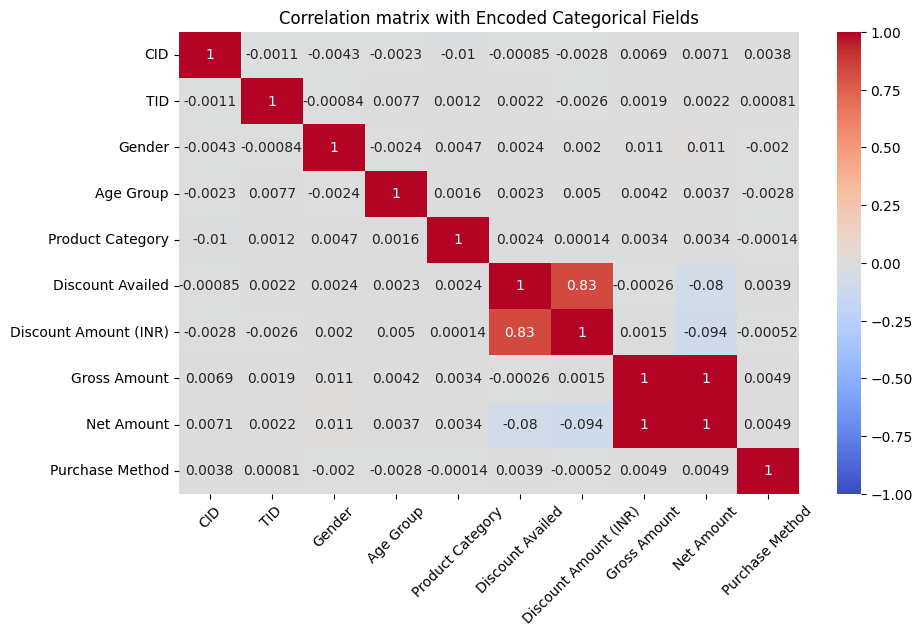

In [19]:
from sklearn.preprocessing import LabelEncoder 

#Copy the dataset to avoid alterations in original dataset.
en_data = ED.copy()

# Encode categorical columns.
label_encoder = LabelEncoder()

# List of categorical columns.
cat_col = ['Gender', 'Age Group', 'Product Category', 'Purchase Method', 'Discount Availed']

# Apply label encoding to each categorical column.
for col in cat_col:
    en_data[col] = label_encoder.fit_transform(en_data[col])

# Drop remaining non-numeric columns like 'Purchse Date', 'Location', 'Discount Name'.
en_data = en_data.drop(columns=['Purchase Date', 'Location', 'Discount Name'])

# Recalculate the correlation matrix
corr_matric_expand = en_data.corr()
# Plot the corrlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matric_expand, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix with Encoded Categorical Fields')
plt.xticks(rotation=45)
plt.show()

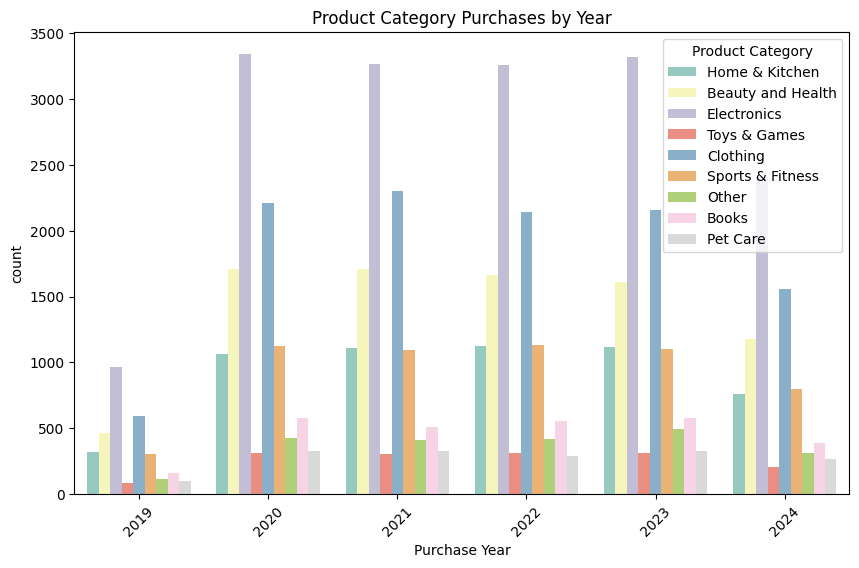

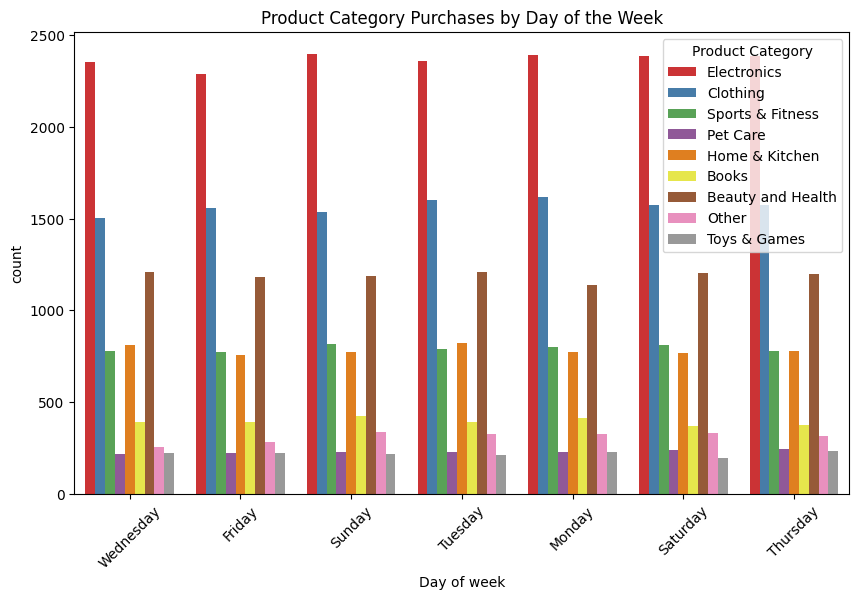

In [26]:
# Ensure "Purchase Date" is converted to datetime.
ED['Purchase Date'] = pd.to_datetime(ED['Purchase Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

#Extract time component from the 'Purchase date'.
ED['Purchase Year'] = ED['Purchase Date'].dt.year
ED['Purchase Month'] = ED['Purchase Date'].dt.month
ED['Day of week'] = ED['Purchase Date'].dt.day_name()

# Analyze trends by plotting counts of Product Category across time components.
# we will use the original 'Product Category' column from 'data' to ensure category names are displayed. 

# plot for product category by year
plt.figure(figsize=(10,6))
sns.countplot(data=ED, x='Purchase Year', hue='Product Category', palette='Set3')
plt.title('Product Category Purchases by Year')
plt.xticks(rotation=45)
plt.show()

# Plot for Product Category by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=ED, x='Day of week', hue='Product Category', palette='Set1')
plt.title('Product Category Purchases by Day of the Week')
plt.xticks(rotation=45)
plt.show()

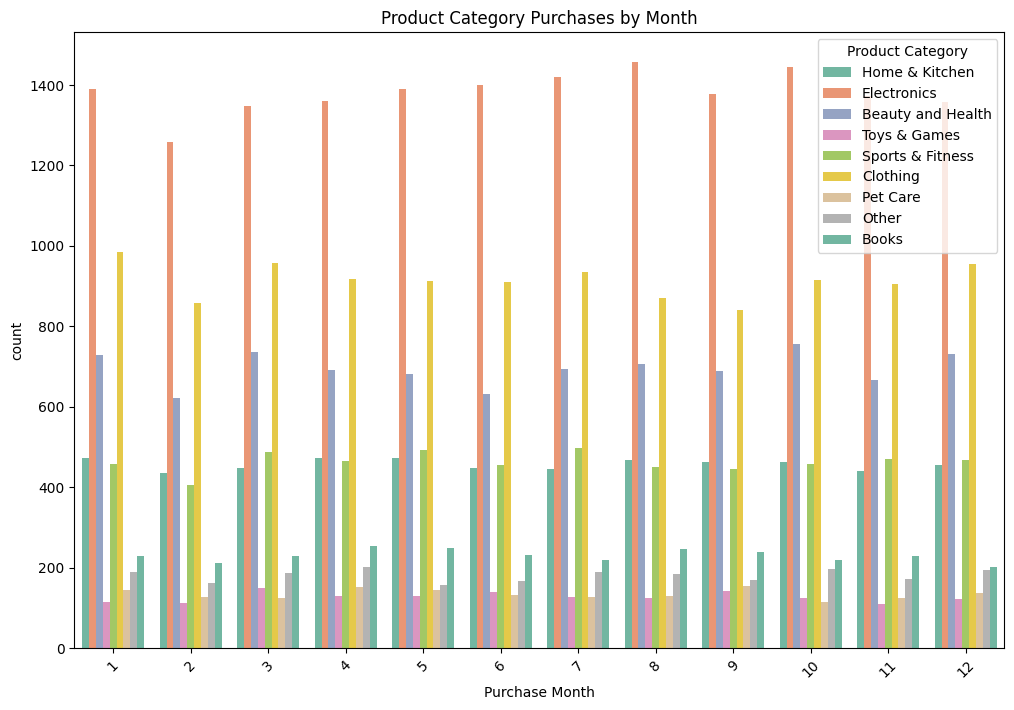

In [23]:
# plot for product category by month.
plt.figure(figsize=(12,8))
sns.countplot(data=ED, x='Purchase Month', hue='Product Category', palette='Set2')
plt.title('Product Category Purchases by Month')
plt.xticks(rotation=45)
plt.show()